# Loading JSON data into n x 32 x 32 dataset

In [1]:
import json
import os
import numpy as np

In [2]:
print(os.getcwd())
data = []
for line in open('../data/raw_data/thermal_raw_20210507_full/20210507_1605_3078.txt', 'r'):
    data.append(np.array(json.loads(line)['data']))
# with open('thermal_raw_20210507_full/20210507_1605_3078.txt') as f:
#   data = json.load(f)

g:\My Drive\1. EIT Digital master\Estland\Semester 1\ML for ES\ias0360-final-project\data_processing


In [3]:
print(data[1][1])
print(len(data[1][1]))
print(data[1].shape)

[12.  11.5 11.1 10.7 11.4 12.3 12.1 11.6 11.7 12.5 11.8 12.6 12.7 12.3
 12.7 12.5 12.7 13.2 13.5 13.1 13.  12.1 12.2 13.  13.6 11.6 11.4 12.7
 13.3 11.5 11.2 11.5]
32
(32, 32)


In [4]:
dataset = np.asarray(data)

In [5]:
dataset.shape

(5000, 32, 32)

# Flattening the data into (n, 32*32)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

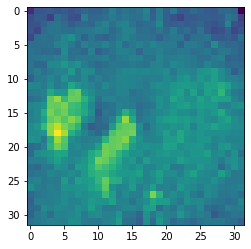

In [7]:
plt.imshow(dataset[3200])

In [8]:
new_ds = dataset 

In [9]:
pixels = new_ds.flatten(order='C').reshape(5000, 32*32)

In [10]:
print(pixels[0][0:32])

[12.5 12.4 12.6 12.3 12.1 13.  13.2 12.8 12.5 13.6 14.2 12.6 13.1 11.4
 13.7 14.4 13.4 14.7 14.4 15.  13.6 13.4 13.6 13.5 13.1 13.3 13.8 13.8
 13.1 13.3 13.4 12.4]


In [11]:
new_ds[0][0]

array([12.5, 12.4, 12.6, 12.3, 12.1, 13. , 13.2, 12.8, 12.5, 13.6, 14.2,
       12.6, 13.1, 11.4, 13.7, 14.4, 13.4, 14.7, 14.4, 15. , 13.6, 13.4,
       13.6, 13.5, 13.1, 13.3, 13.8, 13.8, 13.1, 13.3, 13.4, 12.4])

In [10]:
pixels[0][0:32] == new_ds[0][0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [14]:
pixels.shape

(5000, 1024)

# Dimensionality reduction

In [11]:
from sklearn.decomposition import PCA

In [ ]:

# pca = PCA(n_components= 0.8) # explained variability
# converted_data = pca.fit_transform(pixels)
 
# converted_data.shape

(5000, 1017)

In [12]:
pca = PCA(n_components= 2) # we need 2 principal components to plot.
converted_data = pca.fit_transform(pixels)
 
print(converted_data.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


(5000, 2)
[0.24050424 0.16557649]
0.40608072143909135


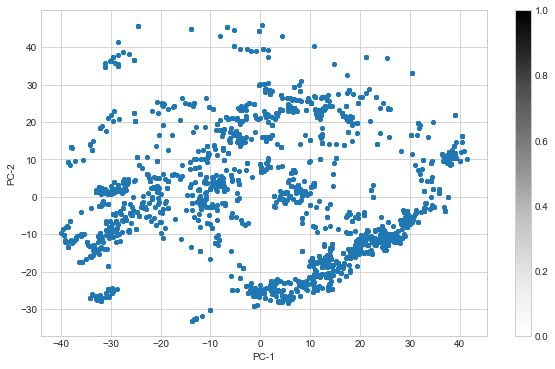

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

### Semi-supervised approach

#### All 200 labels

In [13]:
label = {"521":"Human","2940":"Human","226":"Ambigous heat","3030":"Several humans","1427":"Non-human heat",
         "5951":"Non-human heat","8403":"Human","5609":"Human","167":"Human","1103":"Non-human heat",
         "9090":"Several humans","6760":"Non-human heat","8651":"Human","5474":"Human","2376":"Non-human heat",
         "296":"Ambigous heat","1785":"Human","6825":"Ambigous heat","3844":"Human","6936":"Human",
         "3667":"Several humans","8593":"Ambigous heat","7979":"Ambigous heat","1085":"Non-human heat",
         "5889":"Ambigous heat","7301":"Human","6239":"Human","1402":"Non-human heat","9828":"Ambigous heat",
         "3978":"Several humans","3714":"Several humans","4185":"Human","4913":"Human","2579":"Human",
         "2288":"Non-human heat","4565":"Non-human heat","2090":"Non-human heat","4711":"Human","2930":"Human",
         "256":"No heat","7737":"Human","6101":"Human","9756":"Human","4101":"Several humans","7978":"Ambigous heat",
         "6903":"Several humans","334":"Non-human heat","7054":"Several humans","9618":"Non-human heat",
         "6940":"Several humans","9395":"Human","898":"Human","2398":"Ambigous heat","4737":"Several humans",
         "2343":"Ambigous heat","5111":"Human","5507":"Ambigous heat","6452":"Human","2670":"Non-human heat",
         "3188":"Non-human heat","1087":"Non-human heat","1819":"Non-human heat","2308":"Non-human heat",
         "6085":"Non-human heat","3725":"Non-human heat","8704":"Non-human heat","7052":"Human","8563":"Ambigous heat",
         "2702":"Non-human heat","6782":"Ambigous heat","2931":"Ambigous heat","8754":"Ambigous heat","8229":"Human",
         "4463":"Ambigous heat","3032":"Ambigous heat","3214":"Non-human heat","3018":"Non-human heat","382":"Human",
         "4238":"Non-human heat","7693":"Non-human heat","4269":"Non-human heat","3192":"Ambigous heat",
         "7842":"Non-human heat","8057":"Human","9367":"Non-human heat","5335":"Ambigous heat","8865":"Non-human heat",
         "9033":"Non-human heat","580":"Non-human heat","9038":"Non-human heat","6078":"Non-human heat",
         "8232":"Non-human heat","7677":"Non-human heat","4220":"Non-human heat","8776":"Non-human heat",
         "9911":"Non-human heat","4612":"Non-human heat","5300":"Ambigous heat","5603":"Ambigous heat",
         "3481":"Ambigous heat","6735":"Human","7062":"Several humans","7384":"Several humans","3083":"Non-human heat",
         "3833":"Human","2821":"Non-human heat","6969":"Several humans","2375":"Ambigous heat","1478":"Non-human heat",
         "5014":"Non-human heat","1559":"Ambigous heat","8886":"Non-human heat","7609":"Ambigous heat","5560":"Human",
         "9085":"Human","2933":"Non-human heat","3202":"Several humans","713":"Non-human heat","6258":"Human",
         "3719":"Human","8712":"Non-human heat","8207":"Human","7382":"Non-human heat","8606":"Non-human heat",
         "843":"Ambigous heat","655":"Ambigous heat","9210":"Non-human heat","982":"Non-human heat",
         "9529":"Non-human heat","8895":"Non-human heat","598":"Non-human heat","8940":"Non-human heat",
         "4222":"Human","1422":"Non-human heat","4392":"Non-human heat","4388":"Non-human heat","2606":"Ambigous heat",
         "7773":"Human","1096":"No heat","7538":"Human","5815":"Human","7376":"Human","2846":"Non-human heat",
         "467":"Human","8315":"Non-human heat","9369":"Human","3726":"Ambigous heat","6451":"Human","6847":"Ambigous heat",
         "3410":"Several humans","4323":"Ambigous heat","3232":"Non-human heat","9985":"Non-human heat","6285":"Human",
         "7261":"Human","3932":"Human","9673":"Non-human heat","1312":"No heat","1942":"Human","841":"No heat","4404":"Human",
         "5982":"Non-human heat","3860":"Human","3051":"No heat","5897":"Ambigous heat","7272":"Human","5429":"Non-human heat",
         "8464":"Non-human heat","3594":"Human","7721":"Non-human heat","2535":"Non-human heat","8186":"Human",
         "4749":"Non-human heat","9221":"No heat","9586":"Non-human heat","1534":"Human","4121":"Ambigous heat",
         "6700":"Human","3749":"Ambigous heat","2580":"Non-human heat","7918":"Non-human heat","4645":"Non-human heat",
         "9475":"Human","8820":"No heat","9823":"No heat","4674":"Non-human heat","3848":"Human","1376":"No heat",
         "6349":"Human","4273":"Non-human heat","1308":"No heat","6477":"Human","6674":"Human","2252":"Non-human heat",
         "7700":"Non-human heat","8831":"No heat","8435":"No heat","8851":"Non-human heat","6780":"Non-human heat","6676":"Human"}

#### Get separate classes + str to int

In [14]:
human_lab = [k for k,v in label.items() if v == 'Human']
several_human_lab = [k for k,v in label.items() if v == 'Several humans']
non_human_lab = [k for k,v in label.items() if v == 'Non-human heat']
ambig_lab = [k for k,v in label.items() if v == 'Ambigous heat']
no_heat_lab = [k for k,v in label.items() if v == 'No heat']

#### 3078 <= 5000; C088 > 5000

In [15]:
human_lab = np.array(human_lab, dtype = int)
human_lab = human_lab[human_lab <= 5000]

several_human_lab = np.array(several_human_lab, dtype = int)
several_human_lab = several_human_lab[several_human_lab <= 5000]

non_human_lab = np.array(non_human_lab, dtype = int)
non_human_lab = non_human_lab[non_human_lab <= 5000]

ambig_lab = np.array(ambig_lab, dtype = int)
ambig_lab = ambig_lab[ambig_lab <= 5000]

no_heat_lab = np.array(no_heat_lab, dtype = int)
no_heat_lab = no_heat_lab[no_heat_lab <= 5000]
human_lab

array([ 521, 2940,  167, 1785, 3844, 4185, 4913, 2579, 4711, 2930,  898,
        382, 3833, 3719, 4222,  467, 3932, 1942, 4404, 3860, 3594, 1534,
       3848])

In [19]:
human_lab = np.array(human_lab, dtype = int)
human_lab = human_lab[human_lab > 5000] - 5000

several_human_lab = np.array(several_human_lab, dtype = int)
several_human_lab = several_human_lab[several_human_lab > 5000] - 5000

non_human_lab = np.array(non_human_lab, dtype = int)
non_human_lab = non_human_lab[non_human_lab > 5000] - 5000

ambig_lab = np.array(ambig_lab, dtype = int)
ambig_lab = ambig_lab[ambig_lab > 5000] - 5000

no_heat_lab = np.array(no_heat_lab, dtype = int)
no_heat_lab = no_heat_lab[no_heat_lab > 5000] - 5000
human_lab

array([3403,  609, 3651,  474, 1936, 2301, 1239, 2737, 1101, 4756, 4395,
        111, 1452, 2052, 3229, 3057, 1735,  560, 4085, 1258, 3207, 2773,
       2538,  815, 2376, 4369, 1451, 1285, 2261, 2272, 3186, 1700, 4475,
       1349, 1477, 1674, 1676])

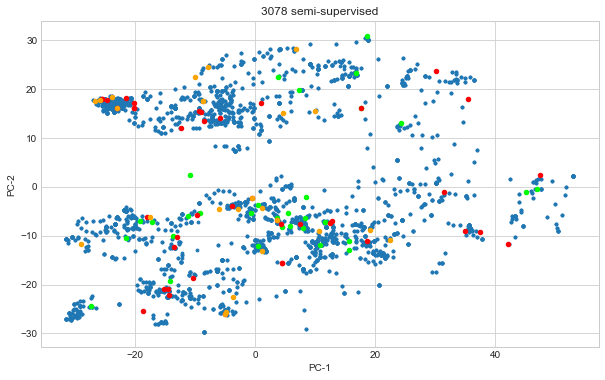

In [16]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 8,
            cmap = c_map)
plt.scatter(converted_data[human_lab, 0], converted_data[human_lab, 1], s = 20,
            color = 'lime')
plt.scatter(converted_data[several_human_lab, 0], converted_data[several_human_lab, 1], s = 20,
            color = 'lime')


plt.scatter(converted_data[non_human_lab, 0], converted_data[non_human_lab, 1], s = 20,
            color = 'red')
plt.scatter(converted_data[ambig_lab, 0], converted_data[ambig_lab, 1], s = 20,
            color = 'orange')
plt.scatter(converted_data[no_heat_lab, 0], converted_data[no_heat_lab, 1], s = 20,
            color = 'orange')

plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.title('3078 semi-supervised')
plt.show()

# Clustering

### DBSCAN

In [24]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [34]:
# Compute DBSCAN
db = DBSCAN(eps=3, min_samples=30).fit(converted_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(converted_data, labels))

Estimated number of clusters: 8
Estimated number of noise points: 502
Silhouette Coefficient: -0.125


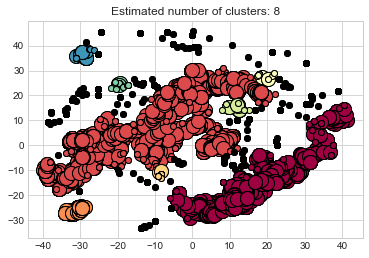

In [35]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = converted_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = converted_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### EM Algorithm

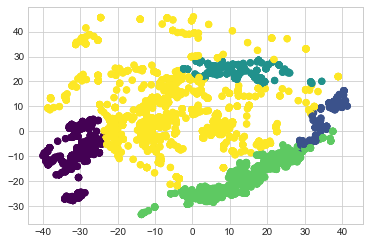

In [17]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5).fit(converted_data)
labels = gmm.predict(converted_data)
plt.scatter(converted_data[:, 0], converted_data[:, 1], c=labels, s=40, cmap='viridis')

In [18]:
probs = gmm.predict_proba(converted_data)
print(probs[:5].round(3))

[[0.    0.    0.    0.982 0.018]
 [0.    0.    0.    0.982 0.018]
 [0.    0.    0.    0.982 0.018]
 [0.    0.    0.    0.982 0.018]
 [0.    0.    0.    0.976 0.024]]


In [19]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Text(0.5, 1.0, 'EM-5 clustering')

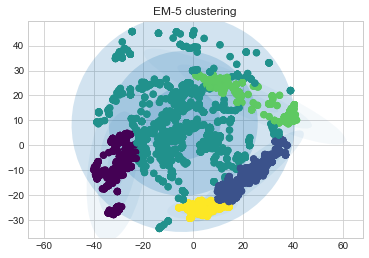

In [20]:

plot_gmm(gmm, converted_data)
plt.title('EM-5 clustering')

### K-Means

In [21]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(converted_data)

In [22]:
y_km

array([3, 3, 3, ..., 3, 3, 3])

Text(0.5, 1.0, '5-means clustering')

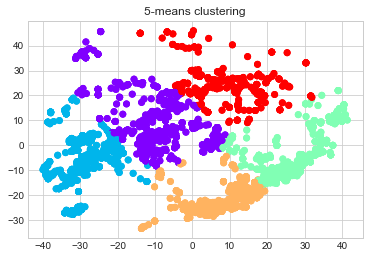

In [23]:
plt.scatter(converted_data[:,0],converted_data[:,1], c=y_km, cmap='rainbow')
plt.title('5-means clustering')